## examine_functions_2.ipynb
### WESmith 05/16/20
- test latest function generator in experiment module

In [21]:
import phial.experiment as ex
import phial.gen_funcs  as gf
import pandas as pd
import itertools as it

In [16]:
def test_func(fun, N):
    return pd.DataFrame([(k, (fun(k))) for k in it.product([0,1], repeat=N)])

In [4]:
exp = ex.Experiment(
    [('A', 'B'), ('A', 'C'), 
     ('B', 'A'), ('B', 'C'), 
     ('C', 'A'), ('C', 'B')],
    funcs=dict(A='OR', B='AND', C='XOR'),
    saveDir='./foo',  # WS note: had to create foo dir: it didn't automatically create it
    title='3-node bidirectional; OR, XOR, AND',  
    comment = 'test node functions',)

In [42]:
# producing 16 funcs for each node: why? each node has only 2 inputs, should be 8 funcs/node
# answer: 4 input states, 2^4 = 16: all possible outputs where ORDER OF INPUTS IS IMPORTANT
# only 8 of these outputs are independent of input order (eg, depend upon sum of inputs)
exp.get_num_funcs 

{'A': 16, 'B': 16, 'C': 16}

In [41]:
# should be 'or', 'and', 'xor': checks ok
for k in ['A', 'B', 'C']:
    print(test_func(exp.net.get_node(k).func, 2))

        0  1
0  (0, 0)  0
1  (0, 1)  1
2  (1, 0)  1
3  (1, 1)  1
        0  1
0  (0, 0)  0
1  (0, 1)  0
2  (1, 0)  0
3  (1, 1)  1
        0  1
0  (0, 0)  0
1  (0, 1)  1
2  (1, 0)  1
3  (1, 1)  0


In [8]:
exp.func_table

{2: [<function phial.gen_funcs.func_from_true_states.<locals>.binary_func(inputs)>,
  <function phial.gen_funcs.func_from_true_states.<locals>.binary_func(inputs)>,
  <function phial.gen_funcs.func_from_true_states.<locals>.binary_func(inputs)>,
  <function phial.gen_funcs.func_from_true_states.<locals>.binary_func(inputs)>,
  <function phial.gen_funcs.func_from_true_states.<locals>.binary_func(inputs)>,
  <function phial.gen_funcs.func_from_true_states.<locals>.binary_func(inputs)>,
  <function phial.gen_funcs.func_from_true_states.<locals>.binary_func(inputs)>,
  <function phial.gen_funcs.func_from_true_states.<locals>.binary_func(inputs)>,
  <function phial.gen_funcs.func_from_true_states.<locals>.binary_func(inputs)>,
  <function phial.gen_funcs.func_from_true_states.<locals>.binary_func(inputs)>,
  <function phial.gen_funcs.func_from_true_states.<locals>.binary_func(inputs)>,
  <function phial.gen_funcs.func_from_true_states.<locals>.binary_func(inputs)>,
  <function phial.gen_fun

In [33]:
for k in range(16):
    print(test_func(exp.func_table[2][k], 2), k)

        0  1
0  (0, 0)  0
1  (0, 1)  0
2  (1, 0)  0
3  (1, 1)  0 0
        0  1
0  (0, 0)  1
1  (0, 1)  0
2  (1, 0)  0
3  (1, 1)  0 1
        0  1
0  (0, 0)  0
1  (0, 1)  1
2  (1, 0)  0
3  (1, 1)  0 2
        0  1
0  (0, 0)  0
1  (0, 1)  0
2  (1, 0)  1
3  (1, 1)  0 3
        0  1
0  (0, 0)  0
1  (0, 1)  0
2  (1, 0)  0
3  (1, 1)  1 4
        0  1
0  (0, 0)  1
1  (0, 1)  1
2  (1, 0)  0
3  (1, 1)  0 5
        0  1
0  (0, 0)  1
1  (0, 1)  0
2  (1, 0)  1
3  (1, 1)  0 6
        0  1
0  (0, 0)  1
1  (0, 1)  0
2  (1, 0)  0
3  (1, 1)  1 7
        0  1
0  (0, 0)  0
1  (0, 1)  1
2  (1, 0)  1
3  (1, 1)  0 8
        0  1
0  (0, 0)  0
1  (0, 1)  1
2  (1, 0)  0
3  (1, 1)  1 9
        0  1
0  (0, 0)  0
1  (0, 1)  0
2  (1, 0)  1
3  (1, 1)  1 10
        0  1
0  (0, 0)  1
1  (0, 1)  1
2  (1, 0)  1
3  (1, 1)  0 11
        0  1
0  (0, 0)  1
1  (0, 1)  1
2  (1, 0)  0
3  (1, 1)  1 12
        0  1
0  (0, 0)  1
1  (0, 1)  0
2  (1, 0)  1
3  (1, 1)  1 13
        0  1
0  (0, 0)  0
1  (0, 1)  1
2  (1, 0)  1
3  (1,

In [46]:
exp.run()

Saved experiment with results to: foo/results_2020-05-16T03:00:57.833166.json


{'timestamp': '2020-05-16 03:00:56.854668',
 'duration': 0.9784981060074642,
 'results': {'100': {'phi': 0.243056, 'elapsed_seconds': 0.2187384479911998},
  '010': {'phi': 0.243056, 'elapsed_seconds': 0.1888717100082431},
  '000': {'phi': 0.194445, 'elapsed_seconds': 0.19309339500614442},
  '111': {'phi': 0.499999, 'elapsed_seconds': 0.18719500699080527},
  '001': {'phi': 0.243056, 'elapsed_seconds': 0.18430148798506707}},
 'connected_components': 2,
 'cycles': 2,
 'filename': None,
 'uname': uname_result(system='Linux', node='smithw-Aspire-E5-576G', release='4.15.0-99-generic', version='#100-Ubuntu SMP Wed Apr 22 20:32:56 UTC 2020', machine='x86_64', processor='x86_64')}

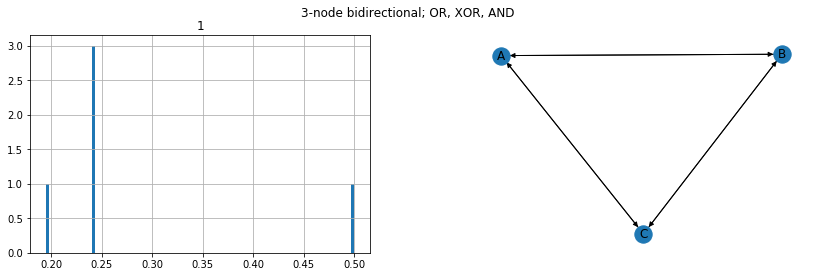

In [47]:
exp.analyze()

# NOTE: this is a different answer than Mayner: max phi should be 1.817